In [1]:
import keras
import cv2


In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
x_train[0].shape

(28, 28)

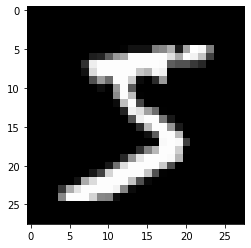

In [5]:
plt.imshow(x_train[0], cmap="gray")

In [6]:
x_train = x_train/255.0  # scales the data. pixel values range from 0 to 255, so this makes it range 0 to 1
x_test = x_test/255.0  # scales the data. pixel values range from 0 to 255, so this makes it range 0 to 1

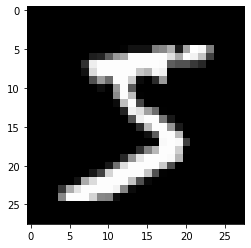

In [7]:
plt.imshow(x_train[0], cmap="gray")

In [8]:
#original
encoder_input = keras.Input(shape=(28, 28, 1), name='img')
x = keras.layers.Flatten()(encoder_input)
encoder_output = keras.layers.Dense(64, activation="relu")(x)

encoder = keras.Model(encoder_input, encoder_output, name='encoder')

decoder_input = keras.layers.Dense(64, activation="relu")(encoder_output)
x = keras.layers.Dense(784, activation="relu")(decoder_input)
decoder_output = keras.layers.Reshape((28, 28, 1))(x)

opt = keras.optimizers.Adam(lr=0.001, decay=1e-6)

autoencoder = keras.Model(encoder_input, decoder_output, name='autoencoder')
autoencoder.summary()

autoencoder.compile(opt, loss='mse')

epochs=3

for epoch in range(epochs):

    history = autoencoder.fit(
      x_train,
      x_train,
      epochs=1, 
      batch_size=32, validation_split=0.10
        )   
    autoencoder.save(f"models/AE-{epoch+1}.model")

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 784)               50960     
_________________________________________________________________
reshape (Reshape)            (None, 28, 28, 1)         0         
Total params: 105,360
Trainable params: 105,360
Non-trainable params: 0
_________________________________________________

In [9]:
example = encoder.predict([ x_test[0].reshape(-1, 28, 28, 1) ])

print(example[0].shape)
print(example[0])

(64,)
[1.9672115  0.8485999  1.1215446  2.340381   0.89200974 0.836168
 0.         1.0703467  1.3302044  0.88526595 0.61547774 0.2960575
 1.2278041  1.3969463  0.         0.95330715 1.4734881  2.335249
 0.49732074 2.3933144  1.2368344  1.427508   1.1879853  1.1299665
 0.74087983 0.77698445 1.327179   1.1004564  0.535414   0.
 1.1498822  0.6390648  0.67856836 0.         2.4592037  3.234999
 1.2762792  1.7560188  1.4170759  1.3760836  1.7311324  1.990629
 1.7703564  1.3377649  3.3063183  0.8762665  0.         0.57207495
 0.96604425 1.0675594  0.48245588 1.7522167  2.6079264  0.5348484
 0.28930318 2.6240785  2.0087805  0.         1.3224801  0.60437113
 2.3266442  2.8410306  0.         2.3735309 ]


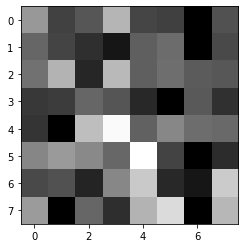

In [10]:
plt.imshow(example[0].reshape((8,8)), cmap="gray")

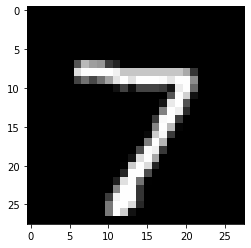

In [11]:
plt.imshow(x_test[0], cmap="gray")

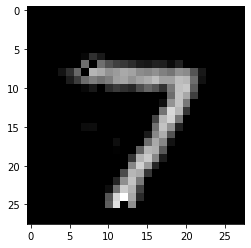

In [12]:
ae_out = autoencoder.predict([ x_test[0].reshape(-1, 28, 28, 1) ])
#img = ae_out[0]  # predict is done on a vector, and returns a vector, even if its just 1 element, so we still need to grab the 0th
plt.imshow(ae_out[0], cmap="gray")